# Importações e analise exploratória dos dados

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from utils import *

from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [15]:
#configurações
df = pd.read_csv('../data/data_bq.csv')
random_state = 30
colors = Colors()



In [16]:
# Verificar estrutura básica dos dados
print_header("ESTRUTURA DO DATASET", colors.text_cyan)
colorfull_print(f"\nDimensões: {df.shape[0]} linhas x {df.shape[1]} colunas", colors.text_yellow)
for col in df.columns: colorfull_print(col, colors.text_green)

print_header("PRIMEIRAS LINHAS", colors.text_cyan)
df.head(10)

ESTRUTURA DO DATASET

Dimensões: 172758 linhas x 13 colunas
codigo_item
descricao_item
codigo_glosa
descricao_glosa
valor_glosa
justificativa
data_realizacao
valor_cobrado
quantidade_item
retorno_operadora
pago
convenio
prestador
PRIMEIRAS LINHAS


,codigo_item,descricao_item,codigo_glosa,descricao_glosa,valor_glosa,justificativa,data_realizacao,valor_cobrado,quantidade_item,retorno_operadora,pago,convenio,prestador
0,40316122,Antígeno Carcinoembriogênico (Cea),1601,REINCIDENCIA NO ATENDIMENTO,140.60,40316122- cobrança realizada conforme senha au...,2024-06-08 03:00:00 UTC,140.60,1,REINCIDENCIA NO ATENDIMENTO,True,UnimedCNU,BP
1,78241030,Conector Spiros Macho S/Trava,1707,NAO EXISTE INFORMACAO SOBRE A TABELA QUE SERA ...,212.22,"78241030- conforme aditivo vigente , simpro pu...",2024-06-04 03:00:00 UTC,212.22,1,NAO EXISTE INFORMACAO SOBRE A TABELA QUE SERA ...,True,UnimedCNU,BP
2,78241057,Tampa esteril CH-CAP 10,1707,NAO EXISTE INFORMACAO SOBRE A TABELA QUE SERA ...,56.13,Considerar 78241057- conforme aditivo vigente ...,2024-06-04 03:00:00 UTC,56.13,1,NAO EXISTE INFORMACAO SOBRE A TABELA QUE SERA ...,True,UnimedCNU,BP
3,78241065,Conector Clave Spike P/Bolsa,1707,NAO EXISTE INFORMACAO SOBRE A TABELA QUE SERA ...,213.91,"78241065- conforme aditivo vigente , simpro pu...",2024-06-04 03:00:00 UTC,213.91,1,NAO EXISTE INFORMACAO SOBRE A TABELA QUE SERA ...,False,UnimedCNU,BP
4,78241090,Conector Valvulado Microclave,1705,VALOR APRESENTADO A MAIOR,67.92,"78241090- conforme aditivo vigente , simpro pu...",2024-06-04 03:00:00 UTC,84.30,1,VALOR APRESENTADO A MAIOR,False,UnimedCNU,BP
5,79419682,Conector p/ Luer Macho e Fêmea,1707,NAO EXISTE INFORMACAO SOBRE A TABELA QUE SERA ...,18.75,"79419682- conforme aditivo vigente , simpro pu...",2024-06-04 03:00:00 UTC,18.75,1,NAO EXISTE INFORMACAO SOBRE A TABELA QUE SERA ...,False,UnimedCNU,BP
6,94301255,Produto Manipulado Forma Farmacêutica Líquida,1707,NAO EXISTE INFORMACAO SOBRE A TABELA QUE SERA ...,3.68,Considerar código 94301255 PRODUTO MANIPULADO ...,2024-06-04 03:00:00 UTC,3.68,1,NAO EXISTE INFORMACAO SOBRE A TABELA QUE SERA ...,False,UnimedCNU,BP
7,150376,Coletor Descartável Estéril 80mL,2010,COBRANCA DE MATERIAIS INCLUSOS NAS TAXAS,13.80,"150376-Conforme composição de taxa de sala, it...",2024-05-10 03:00:00 UTC,13.80,1,COBRANCA DE MATERIAIS INCLUSOS NAS TAXAS,True,UnimedCNU,BP
8,271542,Lamina P/Tricotomizador Cirúrgico Profissional 3M,2010,COBRANCA DE MATERIAIS INCLUSOS NAS TAXAS,141.80,"271542-Conforme composição de taxa de sala, it...",2024-05-10 03:00:00 UTC,141.80,1,COBRANCA DE MATERIAIS INCLUSOS NAS TAXAS,True,UnimedCNU,BP
9,238457,Carga 45mm para Grampeador Ets (Azul Tec.Espes...,1705,VALOR APRESENTADO A MAIOR,314.44,"00238457 -Liberado na senha 510951, guia op 22...",2024-05-10 03:00:00 UTC,964.44,1,VALOR APRESENTADO A MAIOR,False,UnimedCNU,BP


In [17]:
print_header("INFORMAÇÕES DO DADOS", colors.text_cyan)
df.info()

print_header("VALORES NULOS POR COLUNA", colors.text_red)
null_counts = df.isnull().sum()
null_percent = (df.isnull().sum() / len(df)) * 100
null_df = pd.DataFrame({
    'Nulos': null_counts,
    'Percentual': null_percent.round(2)
})
print(null_df[null_df['Nulos'] > 0])


print_header("VALORES DUPLICADOS", colors.text_red)
duplicated_rows = df.duplicated(keep=False)
df_dups = df[duplicated_rows]
print(f"Total de linhas duplicadas: {df_dups.shape[0]}")


INFORMAÇÕES DO DADOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172758 entries, 0 to 172757
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   codigo_item        172758 non-null  int64  
 1   descricao_item     172758 non-null  object 
 2   codigo_glosa       171957 non-null  object 
 3   descricao_glosa    172758 non-null  object 
 4   valor_glosa        172758 non-null  float64
 5   justificativa      172758 non-null  object 
 6   data_realizacao    172758 non-null  object 
 7   valor_cobrado      172758 non-null  float64
 8   quantidade_item    172758 non-null  int64  
 9   retorno_operadora  171957 non-null  object 
 10  pago               172758 non-null  bool   
 11  convenio           172758 non-null  object 
 12  prestador          172758 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 16.0+ MB
VALORES NULOS POR COLUNA
                   Nulos  Percentual

In [18]:
# Removendo linhas com valores nulos e duplicadas
df = df.dropna().drop_duplicates()
# remoção de colunas
df = df.drop(columns=['descricao_item', 'descricao_glosa', 'retorno_operadora', 'data_realizacao'])

''' As colunas de descricao possuem colunas correspondentes em código, o retorno da operadora só é fornecido após  o pagamento ou não da glosa
 e a data do pagamento não é relevante para a analise'''

print_header("DADOS APÓS REMOÇÃO DE VALORES NULOS, DUPLICADOS E COLUNAS NÃO UTILIZADAS", colors.text_cyan)
colorfull_print(f"Dimensões após limpeza: {df.shape[0]} linhas x {df.shape[1]} colunas", colors.text_yellow)

DADOS APÓS REMOÇÃO DE VALORES NULOS, DUPLICADOS E COLUNAS NÃO UTILIZADAS
Dimensões após limpeza: 112193 linhas x 9 colunas


In [19]:
# linhas com target conflitante
cols_except_target = [col for col in df.columns if col != 'pago']
duplicated_cases = df.duplicated(subset=cols_except_target, keep=False)

grouped = df[duplicated_cases].groupby(cols_except_target)['pago'].nunique().reset_index()
conflicting_cases = grouped[grouped['pago'] > 1]

print_header("CASOS CONFLITANTES ENCONTRADOS", colors.text_red)
colorfull_print(f"Foram encontrados {len(conflicting_cases)} casos em que todos os parâmetros são iguais, com target diferente.", colors.text_yellow)

CASOS CONFLITANTES ENCONTRADOS
Foram encontrados 4787 casos em que todos os parâmetros são iguais, com target diferente.


In [20]:
# Remover linhas conflitantes do DataFrame principal
df = df[~df.index.isin(conflicting_cases.index)]
print_header("DADOS APÓS REMOÇÃO DE LINHAS CONFLITANTES", colors.text_cyan)
colorfull_print(f"Dimensões após remoção: {df.shape[0]} linhas x {df.shape[1]} colunas", colors.text_yellow)

DADOS APÓS REMOÇÃO DE LINHAS CONFLITANTES
Dimensões após remoção: 109967 linhas x 9 colunas


VARIÁVEL ALVO: pago

Distribuição:
pago
False    67572
True     42395
Name: count, dtype: int64

Proporção:
pago
False    0.6145
True     0.3855
Name: proportion, dtype: float64


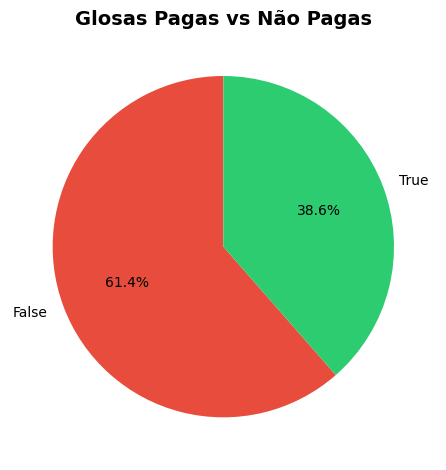

In [21]:
# Análise da variável alvo (pago)
print_header("VARIÁVEL ALVO: pago", colors.text_cyan)

print("\nDistribuição:")
colorfull_print(df['pago'].value_counts(), colors.text_yellow)
line(color=colors.text_cyan)
print("\nProporção:")
colorfull_print(df['pago'].value_counts(normalize=True).round(4), colors.text_yellow)
line(color=colors.text_cyan)



# Gráfico de pizza
df['pago'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
            colors=[colors.red, colors.green], startangle=90)
plt.title('Glosas Pagas vs Não Pagas', fontsize=14, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()


In [22]:
'''
    Balanceamento da base de dados
'''

# Separar as classes
df_majority = df[df['pago'] == False]
df_minority = df[df['pago'] == True]

colorfull_print(f"Classe majoritária (False): {len(df_majority)}", colors.text_red)
colorfull_print(f"Classe minoritária (True): {len(df_minority)}", colors.text_green)

# undersamble
df_majority_sampled = df_majority.sample(n=len(df_minority), random_state=random_state)

# Concatenando
df_balanced = pd.concat([df_majority_sampled, df_minority], ignore_index=True)

df_balanced = df_balanced.sample(frac=1, random_state=random_state).reset_index(drop=True)


print_header("BASE BALANCEADA", colors.text_cyan)
colorfull_print(f"Distribuição do target após balanceamento:\n{df_balanced['pago'].value_counts()}", colors.text_yellow)
line(color=colors.text_cyan)
print(f"\nVerificando valores NaN por coluna:")
print(df_balanced.isnull().sum())
df_balanced.head(10)


Classe majoritária (False): 67572
Classe minoritária (True): 42395
BASE BALANCEADA
Distribuição do target após balanceamento:
pago
True     42395
False    42395
Name: count, dtype: int64

Verificando valores NaN por coluna:
codigo_item        0
codigo_glosa       0
valor_glosa        0
justificativa      0
valor_cobrado      0
quantidade_item    0
pago               0
convenio           0
prestador          0
dtype: int64


,codigo_item,codigo_glosa,valor_glosa,justificativa,valor_cobrado,quantidade_item,pago,convenio,prestador
0,40302075,1705,2.51,Cobrança e valor conforme tabela própria de Pr...,16.71,1,True,Bradesco,HOSPITALIS
1,90347550,2001,20.00,"Glosa indevida, materiais cobrados inerentes a...",20.00,1,False,Bradesco,HOSPITALIS
2,40301990,1705,0.53,COBRANCA E VALOR CONFORME TABELA PROPRIA DE PR...,7.42,1,True,Bradesco,HOSPITALIS
3,31101585,1705,1604.08,"Glosa não procede, cobrança conforme tabela TS...",3341.85,1,True,Bradesco,HOSPITALIS
4,40301281,1817,5.20,"Glosa indevida, paciente apresentou um pedido ...",5.20,1,True,Bradesco,HOSPITALIS
5,40804011,1705,1.06,"Prezados, glosa indevida, cobrança realizada c...",33.38,1,True,Bradesco,HOSPITALIS
6,40302040,1705,0.37,Cobrança e valor conforme tabela própria de Pr...,5.20,1,True,Bradesco,HOSPITALIS
7,40302580,1705,0.37,Cobrança e valor conforme tabela própria de Pr...,5.20,1,False,Bradesco,HOSPITALIS
8,40301630,1705,1.11,Cobrança e valor conforme tabela própria de Pr...,5.20,1,False,Bradesco,HOSPITALIS
9,40307182,1705,3.98,Todos os procedimentos foram cobrados conforme...,55.77,1,False,Bradesco,HOSPITALIS


In [23]:
# Analisando cardinalidade das features categóricas
print_header("ANÁLISE DE CARDINALIDADE", colors.text_cyan)
colorfull_print(f"codigo_item: {df_balanced['codigo_item'].nunique()} valores únicos", colors.text_yellow)
colorfull_print(f"codigo_glosa: {df_balanced['codigo_glosa'].nunique()} valores únicos", colors.text_yellow)
colorfull_print(f"convenio: {df_balanced['convenio'].nunique()} valores únicos", colors.text_yellow)
colorfull_print(f"prestador: {df_balanced['prestador'].nunique()} valores únicos", colors.text_yellow)


ANÁLISE DE CARDINALIDADE
codigo_item: 2102 valores únicos
codigo_glosa: 173 valores únicos
convenio: 9 valores únicos
prestador: 2 valores únicos


# Embedding (justificativa)

# Encoders e pré-processamento

In [24]:
#Separando features e target
X = df_balanced.drop(columns=['pago'])
y = df_balanced['pago']

In [ ]:
'''
    Tendo em vista que codigo_item e codigo_glosa possuem alta cardinalidade, vamos utilizar target encoding
    para essas features, já convenio e prestador vamos utilizar one hot encoding devido à baixa cardinalidade
'''

one_hot_cols = ['convenio', 'prestador']
target_encode_cols = ['codigo_item', 'codigo_glosa']
numeric_cols = ['valor_cobrado', 'valor_glosa', 'quantidade_item']

# Transformações nos dados
transformer = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("onehot", OneHotEncoder(handle_unknown='ignore'), one_hot_cols),
    ("target", TargetEncoder(), target_encode_cols)
])

# Pipeline de pré-processamento
preprocessing = Pipeline([
    ("transformer", transformer),
])

In [ ]:
# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Modelos a serem testados
models = {
    "Random Forest": Pipeline([
        ('preprocessing', preprocessing),
        ('classifier', RandomForestClassifier(random_state=random_state))
    ]),
    
    "MPL": Pipeline([
        ('preprocessing', preprocessing),
        ('classifier', MLPClassifier(random_state=random_state, max_iter=300))
    ])
    
}
